In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
%matplotlib inline  

In [0]:
from sklearn.datasets import load_boston
boston_data = load_boston()

In [3]:
# printing it
print(boston_data)#this data is tough to understand 

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [4]:
print(boston_data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
# medv variable

In [5]:
# assigning column names
boston = pd.DataFrame(boston_data.data, columns=boston_data.feature_names)

# printing
boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
import numpy as np
# Exploring more data
lstat = boston['LSTAT'] 
min_price = np.amin(lstat)  
max_price = np.amax(lstat)  
mean_price = np.mean(lstat)  
std_price = np.std(lstat)  


print("Minimum price is: ",min_price)
print("Maximum price is: ",max_price)
print("Mean is: ",mean_price)
print("Standard deviation is: ",std_price)


Minimum price is:  1.73
Maximum price is:  37.97
Mean is:  12.653063241106723
Standard deviation is:  7.134001636650485


In [11]:
# price denoted by the MEDV is the target variable
boston['MEDV'] = boston_data.target

# printing the target variable
print(boston['MEDV'])

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: MEDV, Length: 506, dtype: float64


In [0]:
"""Data preprocessing"""
# to check if there are any null values
boston.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

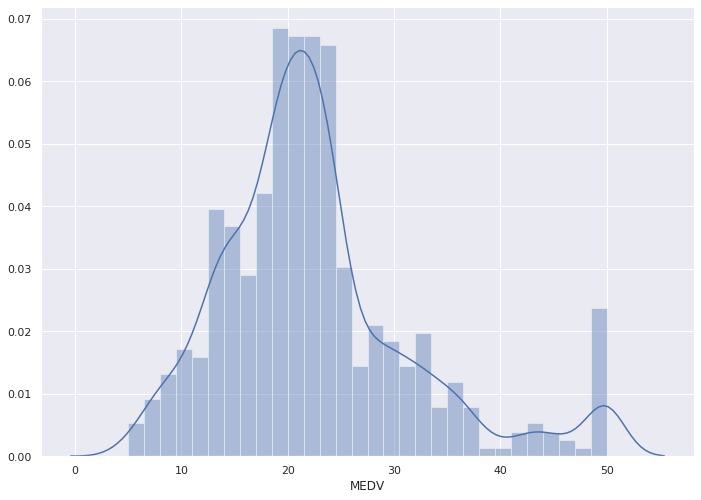

In [0]:
"""EDA"""


sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston['MEDV'], bins=30)
plt.show()

In [0]:
# we observe that medv is distributed normally but there are some outliers.

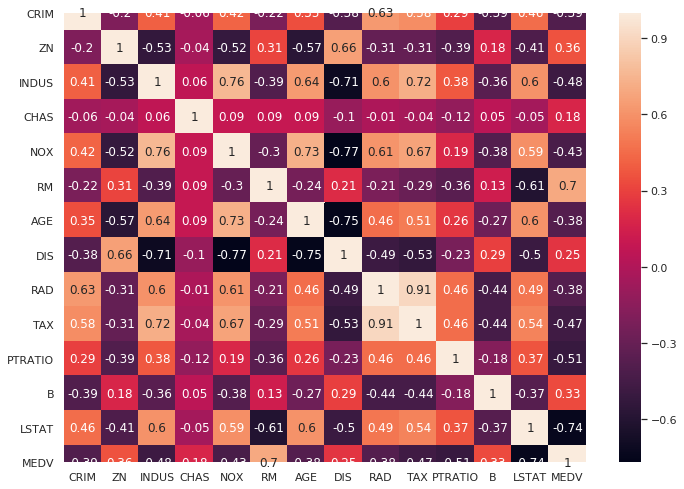

In [0]:
# performing correlation matrix to find out realtionship between variables
import seaborn as sns
correlation_matrix = boston.corr().round(2)
sns.heatmap(data=correlation_matrix,annot=True)

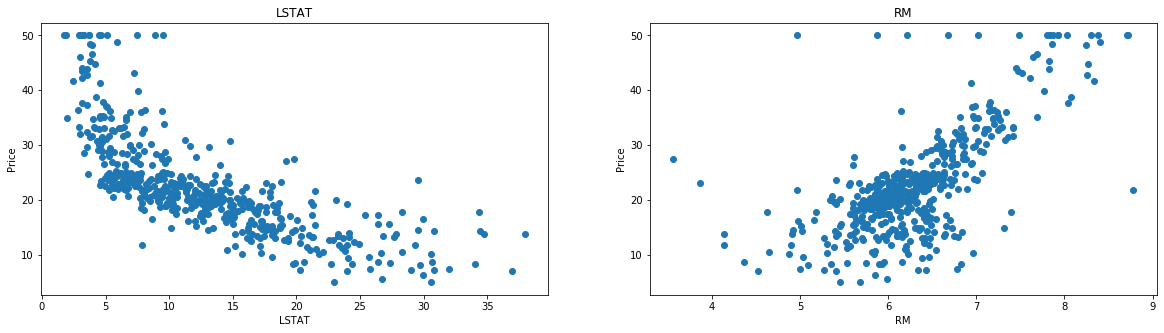

In [12]:
"""Now to fit to the linear regression model. we will select the features which have higher correlation with the target variable MEDV."""
# RM has strong positive correlation with MEDV (0.7). LSAT has negative correlation -0.74 with the MEDV
#  RAD and TAX has correlation of 0.91. so these features are sotrongly paired to each other.

plt.figure(figsize=(20,5))
features = ['LSTAT','RM']
target = boston['MEDV']

for i, col in enumerate(features):
    plt.subplot(1, len(features) , i+1)
    x = boston[col]
    y = target

    plt.scatter(x, y, marker='o')
    plt.title(col)
    
    plt.xlabel(col)
    plt.ylabel('Price')


In [0]:
#  And price decreases with increase of LSTAT
# we observe that price increases as RM increases linearly.Also there are few outliers present


In [0]:
"""Now preparing data for training model"""
X = pd.DataFrame(np.c_[boston['LSTAT'], boston['RM']], columns = ['LSTAT','RM'])
Y = boston['MEDV']



In [0]:
# splitting the data
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state=5)


In [15]:
# checking the shape
print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)


(404, 2)
(102, 2)
(404,)
(102,)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lin_model = LinearRegression()
lin_model.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [17]:
"""Evaluating the Model"""
from sklearn.metrics import r2_score

# for training set
y_train_predict = lin_model.predict(X_train)
rmse = (np.sqrt(mean_squared_error(Y_train, y_train_predict)))
r2 = r2_score(Y_train, y_train_predict)

print(" performance(training set)")
print('rmse is {}'.format(rmse))
print('R2 score is {}'.format(r2))
print("\n")

# for testing set
y_test_predict = lin_model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(Y_test, y_test_predict)))
r2 = r2_score(Y_test, y_test_predict)

print("performance (testing set)")
print('rmse is {}'.format(rmse))
print('R2 score is {}'.format(r2))

 performance(training set)
rmse is 5.6371293350711955
R2 score is 0.6300745149331701


performance (testing set)
rmse is 5.137400784702911
R2 score is 0.6628996975186952
